## Step 1: Load the Data

In [1]:
import pandas as pd

# Load data
df = pd.read_excel('Telco_customer_churn.xlsx')

# Display the first few rows
df.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [2]:
# Get basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [3]:
# Get statistical summary
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


## Step 2: Handle Missing Values

In [4]:
# Check for missing values
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [5]:
# Replace null values in the "Churn Reason" column with "Unknown"
df['Churn Reason'].fillna('Unknown', inplace=True)

# Verify that there are no null values left in the "Churn Reason" column
df['Churn Reason'].isnull().sum()

C:\Users\shuchismita_mallick.Shuchismita\AppData\Local\Temp\ipykernel_14520\476323204.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Churn Reason'].fillna('Unknown', inplace=True)


0

In [6]:
df['Churn Reason'].unique()

array(['Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction',
       'Lack of self-service on Website', 'Network reliability',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Extra data charges', "Don't know",
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Attitude of support person', 'Deceased', 'Unknown'], dtype=object)

## Step 3: Data Cleaning 

In [7]:
df.drop(columns = ['Country', 'State'], axis =1 , inplace= True)

In [8]:
df['Lat Long'].head()

0    33.964131, -118.272783
1     34.059281, -118.30742
2    34.048013, -118.293953
3    34.062125, -118.315709
4    34.039224, -118.266293
Name: Lat Long, dtype: object

In [9]:
lat_long_split = df['Lat Long'].str.split(',', expand=True)
df['Latitude'] = lat_long_split[0].astype(float)
df['Longitude'] = lat_long_split[1].astype(float)

# Step 2: Drop the original "Lat Long" column
df.drop(columns=['Lat Long'], inplace=True)

In [10]:
df['Total Charges'].head()

0     108.15
1     151.65
2      820.5
3    3046.05
4     5036.3
Name: Total Charges, dtype: object

In [11]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [12]:
df.shape

(7043, 30)

In [13]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(7043, 30)

## Step 4: Data Visualization

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df.columns

Index(['CustomerID', 'Count', 'City', 'Zip Code', 'Latitude', 'Longitude',
       'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

### Scenario 1: What is the overall distribution of churn?
Question: "Can you provide an overview of the churn distribution in our customer base?"

--------------------------
The plot will show the count of customers who have churned versus those who have not. This gives us a baseline understanding of the churn rate.

C:\Users\shuchismita_mallick.Shuchismita\AppData\Local\Temp\ipykernel_14520\3062878439.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn Label', data=df, palette='viridis')


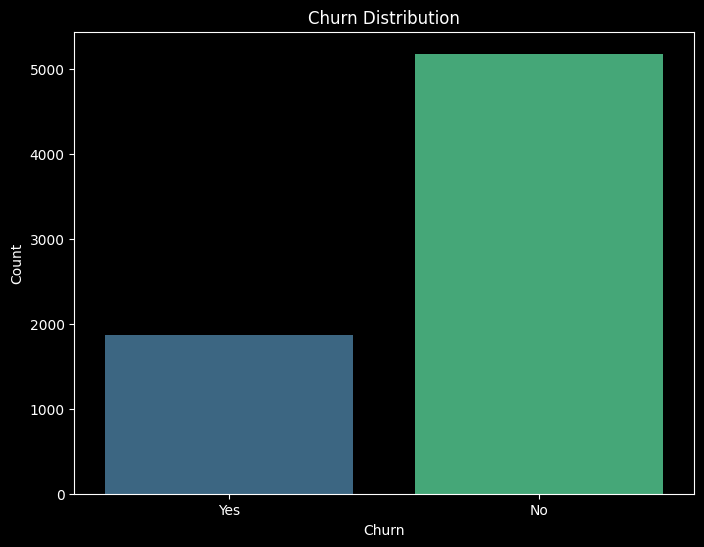

In [17]:
# Plot the distribution of churn
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn Label', data=df, palette='viridis')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

### Scenario 2: What are the demographic characteristics of customers who churn?
Question: "What are the demographic characteristics (e.g., gender, senior citizen status) of customers who are more likely to churn?" 

-----------------
These plots will help us understand if gender or senior citizen status has any influence on churn. We can compare the distribution of churn across these demographic groups.

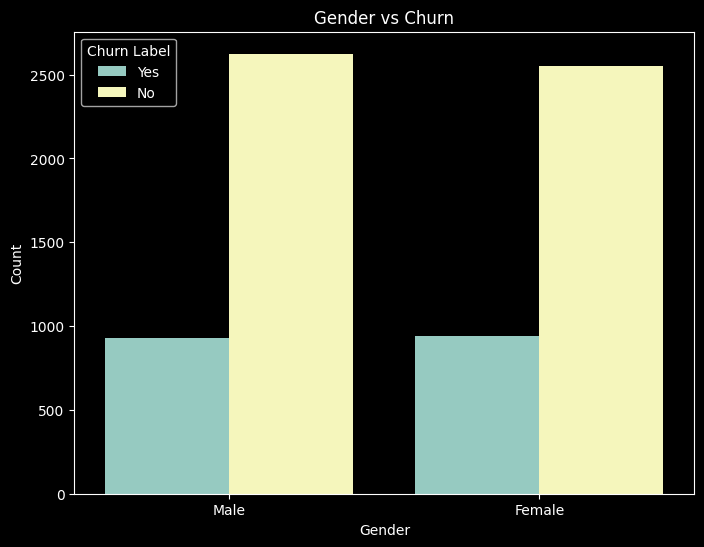

In [18]:
# Gender vs Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Churn Label', data=df)
plt.title('Gender vs Churn')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


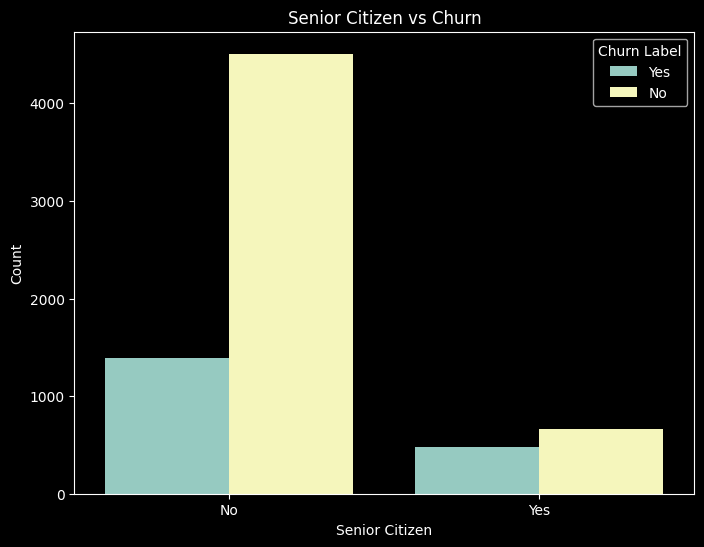

In [19]:
# Senior Citizen vs Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='Senior Citizen', hue='Churn Label', data=df)
plt.title('Senior Citizen vs Churn')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.show()

### Scenario 3: How does tenure affect churn?
Question: "Is there a relationship between the length of tenure with the company and churn?"


--------------------------------------
The plot will show how tenure is distributed among churned and non-churned customers. We can observe if longer-tenure customers are less likely to churn.

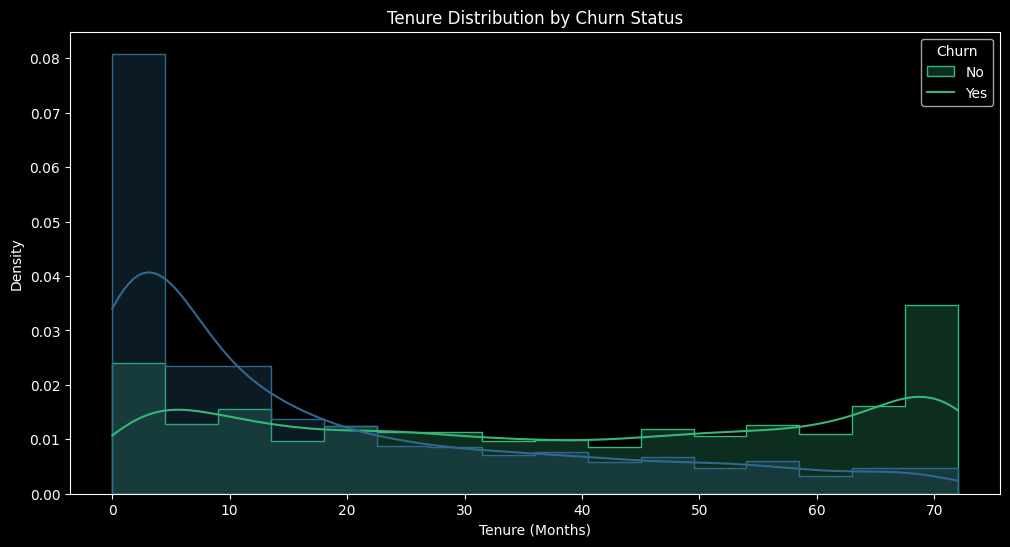

In [20]:
# Tenure vs Churn
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Tenure Months', hue='Churn Label', element='step', stat='density', common_norm=False, palette='viridis', kde=True)
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Tenure (Months)')
plt.ylabel('Density')
plt.legend(title='Churn', labels=['No', 'Yes'], loc='upper right')

plt.show()


### Scenario 4: What is the impact of monthly charges on churn?
Question: "Do customers with higher monthly charges tend to churn more?"

--------------------------------------
This plot will help us see if there is a significant difference in monthly charges between customers who churn and those who don't.

C:\Users\shuchismita_mallick.Shuchismita\AppData\Local\Temp\ipykernel_14520\2373861424.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn Label', y='Monthly Charges', data=df, palette='viridis')


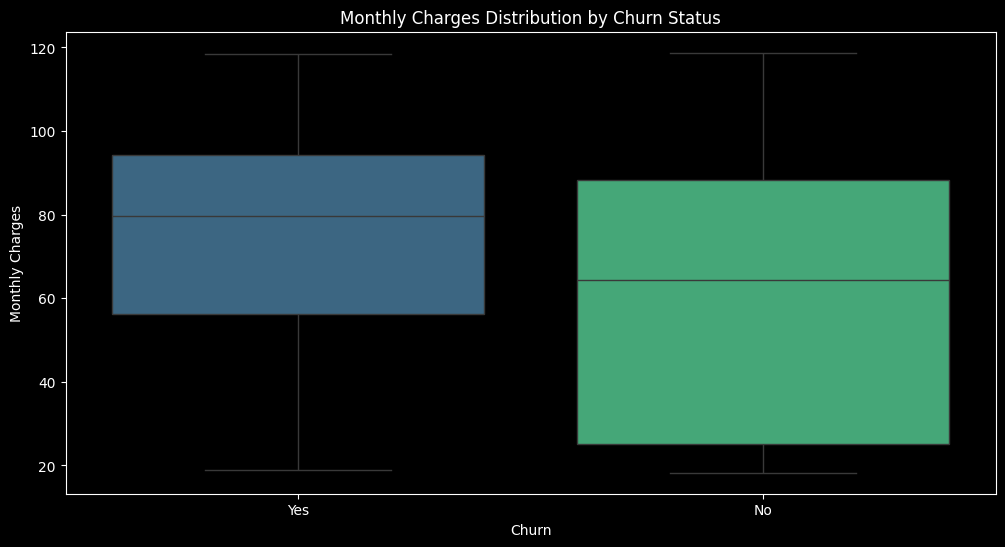

In [21]:
# Monthly Charges vs Churn
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn Label', y='Monthly Charges', data=df, palette='viridis')
plt.title('Monthly Charges Distribution by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')

plt.show()


### Scenario 5: How does contract type affect churn?
Question: "Does the type of contract (month-to-month, one year, two years) influence the likelihood of churn?"

-----------------------------
This plot will show the distribution of churn across different contract types. It helps us understand if longer contracts are associated with lower churn rates.

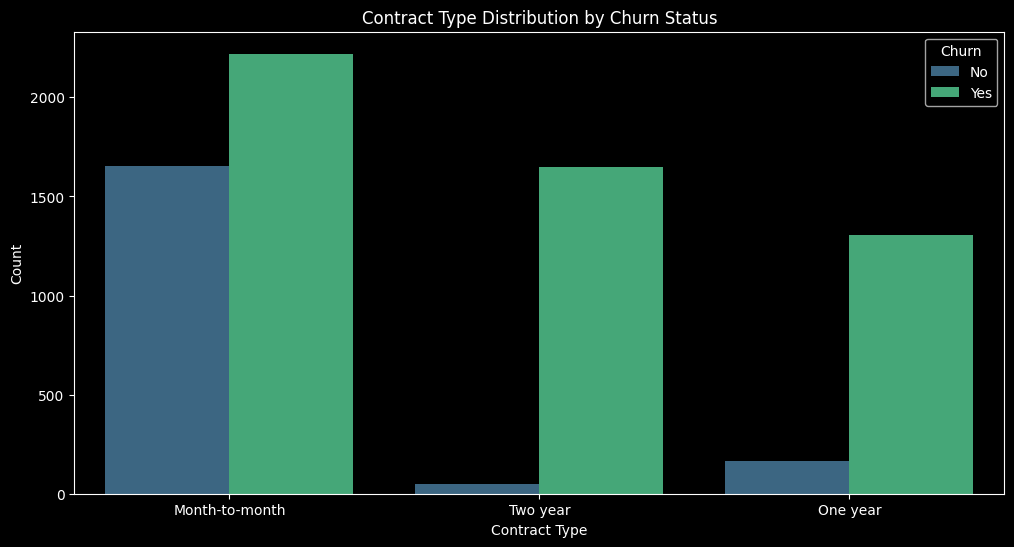

In [22]:
# Contract vs Churn
plt.figure(figsize=(12, 6))
sns.countplot(x='Contract', hue='Churn Label', data=df, palette='viridis')
plt.title('Contract Type Distribution by Churn Status')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'], loc='upper right')

plt.show()

### Scenario 6: What is the relationship between different services and churn?
Question: "Are certain services (e.g., internet service, phone service) associated with higher churn rates?"

--------------------------------------------------------
These plots will help us see if there are higher churn rates associated with specific services. This insight can guide service improvements or targeted retention efforts.


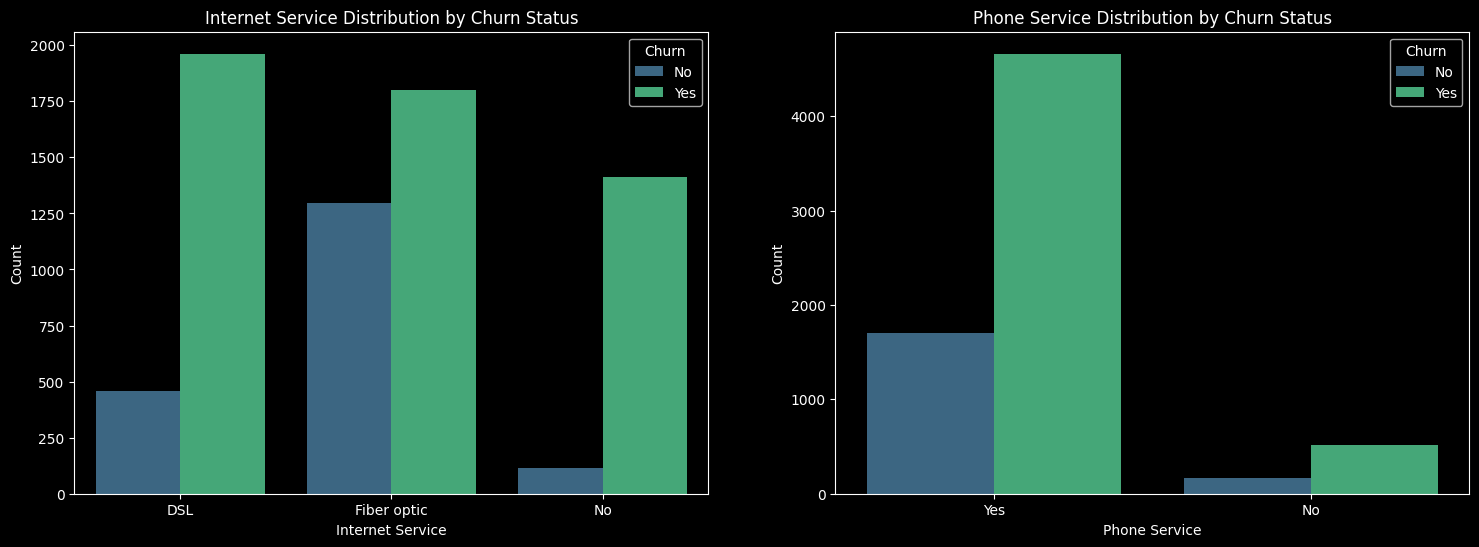

In [23]:
# Plot internet service distribution by churn status
plt.figure(figsize=(18, 6))

# Internet Service vs Churn
plt.subplot(1, 2, 1)
sns.countplot(x='Internet Service', hue='Churn Label', data=df, palette='viridis')
plt.title('Internet Service Distribution by Churn Status')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'], loc='upper right')

# Phone Service vs Churn
plt.subplot(1, 2, 2)
sns.countplot(x='Phone Service', hue='Churn Label', data=df, palette='viridis')
plt.title('Phone Service Distribution by Churn Status')
plt.xlabel('Phone Service')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'], loc='upper right')


### Scenario 7: What is the relationship between payment methods and churn?
Question: "Are certain payment methods associated with higher churn rates?"

-------------------

This plot will help us see if customers using certain payment methods are more likely to churn. This insight can help in understanding if payment convenience or security impacts customer retention.

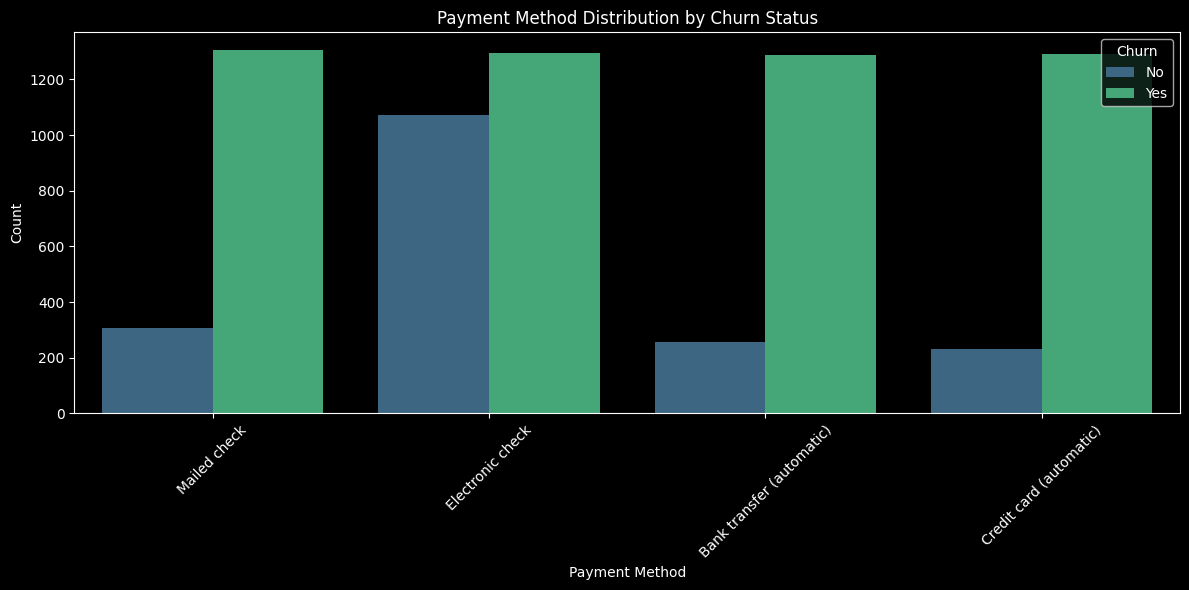

In [24]:
# Payment Method vs Churn
plt.figure(figsize=(12, 6))
sns.countplot(x='Payment Method', hue='Churn Label', data=df, palette='viridis')
plt.title('Payment Method Distribution by Churn Status')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'], loc='upper right')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Scenario 8: How do additional services affect churn?
Question: "Do additional services like streaming TV, streaming movies, or online security influence customer churn?"

---------------------------
These plots will help us determine if customers who subscribe to additional services are more or less likely to churn. This can guide decisions on bundling services or improving specific offerings.

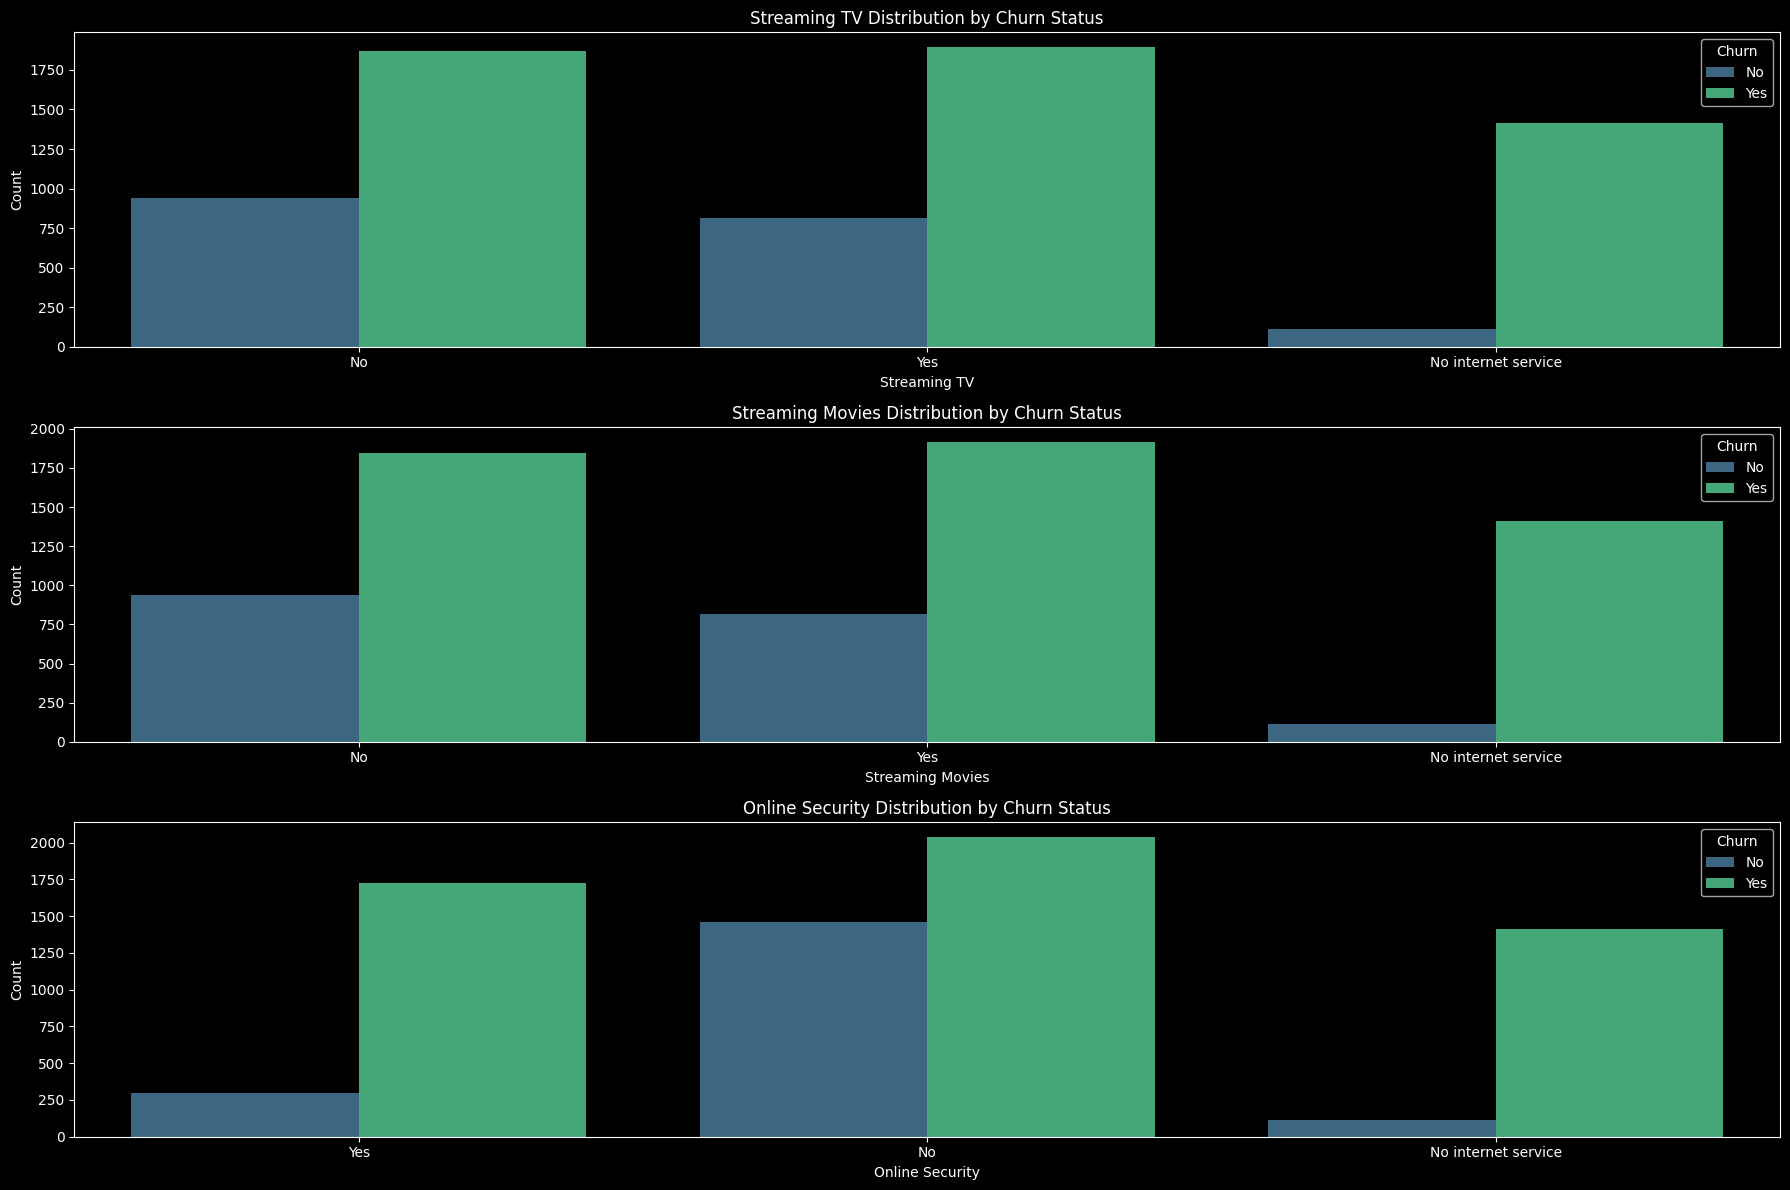

In [25]:
# Plot additional services distribution by churn status
plt.figure(figsize=(18, 12))

# Streaming TV vs Churn
plt.subplot(3, 1, 1)
sns.countplot(x='Streaming TV', hue='Churn Label', data=df, palette='viridis')
plt.title('Streaming TV Distribution by Churn Status')
plt.xlabel('Streaming TV')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'], loc='upper right')

# Streaming Movies vs Churn
plt.subplot(3, 1, 2)
sns.countplot(x='Streaming Movies', hue='Churn Label', data=df, palette='viridis')
plt.title('Streaming Movies Distribution by Churn Status')
plt.xlabel('Streaming Movies')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'], loc='upper right')

# Online Security vs Churn
plt.subplot(3, 1, 3)
sns.countplot(x='Online Security', hue='Churn Label', data=df, palette='viridis')
plt.title('Online Security Distribution by Churn Status')
plt.xlabel('Online Security')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'], loc='upper right')

plt.tight_layout()
plt.show()

### Summary of EDA

* Churn Distribution: We saw the overall distribution of churn, providing a baseline understanding.
* Demographic Insights: Gender and senior citizen status offered insights into churn tendencies.
* Tenure Analysis: Longer tenure appeared to correlate with lower churn.
* Financial Insights: Monthly charges showed a relationship with churn.
* Contract Impact: Different contract types influenced churn rates.
* Service Correlations: Specific services were associated with varying churn rates.


## Step 5: Data Transformation

In [ ]:
# Step 1: Find out categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index(['CustomerID', 'City', 'Gender', 'Senior Citizen', 'Partner',
       'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Churn Label', 'Churn Reason'],
      dtype='object')


In [ ]:
# Columns to delete
columns_to_delete = ['CustomerID']

# Remove specified columns
categorical_columns = [col for col in categorical_columns if col not in columns_to_delete]

In [ ]:
# Step 2: Use label encoding to encode the categorical columns
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le